# Usando Machine Learning para predizer dígitos à mão

In [44]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Carregando a base de dados**

In [2]:
digitos = datasets.load_digits()

**Descrição da base de dados**

In [3]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digitos.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [5]:
digitos.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando imagens e labels

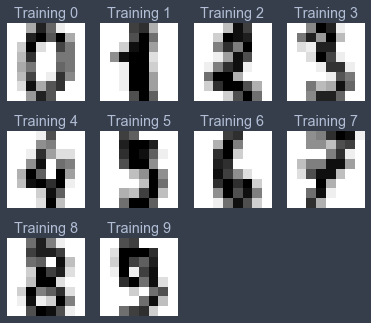

In [6]:
images = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training %i' %label)

#### Convertendo dados para dataframe

In [7]:
n_samples = len(digitos.images)
data = digitos.images.reshape((n_samples, -1))
classe = digitos.target

In [8]:
df = pd.DataFrame(data)
df['Classe'] = classe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Classe', axis=1), df['Classe'], test_size=0.3)

#### Treinando os dados

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(3)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predizendo valores

In [13]:
resultado = knn.predict(X_test)

In [14]:
resultado

array([8, 2, 8, 7, 9, 7, 8, 3, 9, 3, 4, 9, 0, 1, 9, 7, 9, 9, 5, 3, 6, 1,
       8, 2, 4, 5, 6, 3, 5, 1, 0, 6, 3, 1, 8, 8, 1, 1, 8, 2, 5, 1, 5, 5,
       9, 6, 3, 3, 3, 6, 9, 3, 5, 3, 7, 2, 6, 0, 4, 6, 1, 1, 0, 7, 9, 7,
       1, 0, 5, 0, 7, 6, 6, 2, 2, 5, 4, 1, 5, 0, 0, 7, 5, 6, 8, 1, 3, 9,
       8, 7, 2, 3, 0, 9, 9, 1, 2, 5, 6, 2, 4, 3, 4, 7, 1, 4, 6, 8, 8, 1,
       3, 5, 3, 3, 0, 5, 0, 9, 1, 2, 7, 6, 6, 9, 9, 3, 3, 1, 0, 2, 3, 0,
       2, 1, 1, 9, 0, 5, 7, 2, 5, 2, 4, 1, 3, 1, 2, 1, 8, 3, 1, 0, 8, 2,
       6, 0, 1, 5, 9, 9, 7, 6, 1, 1, 9, 9, 9, 1, 9, 9, 1, 6, 8, 7, 6, 3,
       1, 9, 8, 4, 2, 9, 2, 6, 9, 6, 8, 9, 8, 6, 1, 7, 7, 2, 8, 4, 5, 7,
       7, 0, 3, 1, 3, 9, 9, 9, 6, 7, 0, 5, 3, 5, 0, 4, 5, 1, 3, 3, 1, 8,
       0, 1, 5, 6, 9, 0, 7, 7, 1, 0, 4, 9, 8, 5, 7, 3, 3, 7, 3, 6, 1, 8,
       7, 0, 2, 8, 6, 0, 8, 9, 5, 0, 6, 2, 2, 4, 6, 8, 4, 1, 7, 7, 0, 2,
       0, 4, 9, 0, 4, 5, 2, 2, 0, 7, 1, 3, 7, 6, 9, 7, 4, 2, 1, 5, 7, 0,
       2, 4, 4, 8, 7, 2, 3, 7, 8, 9, 3, 8, 0, 0, 4,

In [15]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        59
           3       0.96      1.00      0.98        54
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        52
           6       0.98      1.00      0.99        54
           7       1.00      0.98      0.99        60
           8       1.00      0.96      0.98        50
           9       0.98      0.96      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### Matriz de confusão

In [16]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['        Predito'], margins=True))

        Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                        
0                55   0   0   0   0   0   0   0   0   0   55
1                 0  59   0   0   0   0   0   0   0   0   59
2                 0   0  59   0   0   0   0   0   0   0   59
3                 0   0   0  54   0   0   0   0   0   0   54
4                 0   0   0   0  40   0   0   0   0   0   40
5                 0   0   0   0   0  52   0   0   0   0   52
6                 0   0   0   0   0   0  54   0   0   0   54
7                 0   0   0   0   0   0   0  59   0   1   60
8                 0   0   0   1   0   0   1   0  48   0   50
9                 0   0   0   1   1   0   0   0   0  55   57
All              55  59  59  56  41  52  55  59  48  56  540


### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

In [24]:
scores = cross_val_score(knn, df.drop('Classe', axis=1), df['Classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

## Otimizando o parâmetro K

In [19]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parâmetro

In [20]:
k_list = list(range(1,31))

In [21]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instanciando o GridSearch

In [22]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Treinando o objeto

In [25]:
grid.fit(df.drop('Classe', axis=1), df['Classe'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### Verificando os scores

In [34]:
escores = grid.cv_results_.get('mean_test_score')
escores

array([0.96439338, 0.96717115, 0.96606469, 0.96384092, 0.96272826,
       0.95938564, 0.95994584, 0.95827608, 0.95661096, 0.95494274,
       0.9554983 , 0.95605231, 0.95549675, 0.95605076, 0.95438254,
       0.95438409, 0.95326679, 0.94937481, 0.95048437, 0.94992881,
       0.94881925, 0.94937635, 0.9482637 , 0.94882389, 0.94603838,
       0.94548282, 0.94380997, 0.94324977, 0.94102755, 0.94102445])

In [41]:
print('Melhor score: ', grid.best_score_)
print('Melhor valor de k: ', grid.best_params_)

Melhor score:  0.9671711544413494
Melhor valor de k:  {'n_neighbors': 2}


### Visualizaçao dos valores de K e acurácia

No handles with labels found to put in legend.


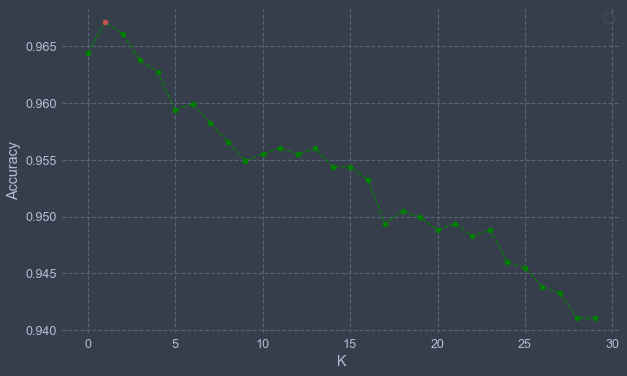

In [65]:
plt.figure(figsize=(10,6))
plt.plot(escores, color='green', linestyle='dashed', marker='o')
plt.plot(1, grid.best_score_, marker='o', c='r')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend('O ponto em verm')
plt.show()